In [ ]:
import tensorflow as tf
import pandas as pd 
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split


df1 = pd.read_csv("/content/drive/MyDrive/train.csv")
df1 = df1.drop(columns = 'Date ID')



from sklearn.preprocessing import StandardScaler
scaler1 = StandardScaler()
df1 = scaler1.fit_transform(df1)




df2 = pd.DataFrame(df1)
df2

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-1.292878,-1.316538,-1.318502,-1.318833,0.453783,-0.626098,2.907426,-1.841589,-2.680986,2.034078,...,0.523282,0.914296,0.100178,-1.322519,-1.308370,-1.292440,-1.229121,-1.222819,-1.312398,-1.052556
1,-1.316632,-1.301031,-1.293193,-1.311623,-0.347321,-1.063006,2.713856,-1.720672,-2.510628,1.916640,...,-0.010105,0.550404,0.245788,-1.331601,-1.301526,-1.269584,-1.237366,-1.228465,-1.303846,0.950068
2,-1.312094,-1.318543,-1.301190,-1.303064,-0.706061,-1.053089,2.552001,-1.593824,-2.347272,1.837073,...,-0.295479,0.077950,0.557242,-1.331290,-1.299728,-1.266294,-1.245420,-1.233185,-1.311020,0.950068
3,-1.303988,-1.320767,-1.300249,-1.310243,-0.492555,-0.967487,2.401708,-1.492392,-2.194940,1.711782,...,-0.250986,-0.201066,0.431235,-1.350539,-1.306692,-1.260892,-1.252889,-1.238072,-1.310299,-1.052556
4,-1.310592,-1.321018,-1.299654,-1.309522,0.188794,-0.363247,2.262150,-1.397663,-2.052859,1.595292,...,-0.204385,-0.271077,0.445396,-1.362145,-1.310212,-1.256274,-1.260833,-1.242596,-1.271111,0.950068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,2.193607,2.200674,2.220890,2.222528,-0.458591,0.523854,-0.951965,0.473086,0.081009,1.204019,...,1.297509,1.390569,1.252519,2.170168,2.201920,2.230998,2.150158,2.165956,2.243132,0.950068
1950,2.228033,2.228460,2.239520,2.246667,-0.150293,0.633787,-1.016968,0.610732,0.196504,1.293163,...,1.321217,1.409179,1.221444,2.188007,2.219865,2.249025,2.156667,2.175454,2.217601,0.950068
1951,2.239770,2.232815,2.234063,2.221117,0.025968,0.646680,-1.067969,0.662096,0.299862,1.155227,...,0.885473,1.262278,0.913166,2.191413,2.223328,2.252541,2.163124,2.182660,2.209551,-1.052556
1952,2.219208,2.221631,2.228543,2.213060,2.004322,2.732901,-1.105397,0.677084,0.385746,0.956658,...,0.194169,0.864677,0.818284,2.189698,2.227564,2.262758,2.170764,2.188873,2.242631,-1.052556


In [ ]:
X = df2.drop(columns = 21 )
y = df2.iloc[:, 21].values

X = np.array(X)
X.shape

(1954, 22)

In [ ]:




X.shape = (1954, 22 , 1)



from sklearn.model_selection import train_test_split

X_train , X_test ,y_train,  y_test = train_test_split(X , y , test_size = 0.1 , shuffle =False)
X.shape

(1954, 22, 1)

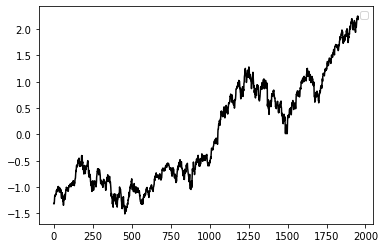

In [ ]:


plt.plot(y, color = 'black')
plt.legend()
plt.show()


In [ ]:
from keras import Sequential
from keras.layers import LSTM , Dense ,Dropout


regg = Sequential([
    keras.layers.Bidirectional(LSTM(32 , activation ='tanh', input_shape=(21 ,1), return_sequences = True)),
    keras.layers.Dropout(0.3),
    keras.layers.Bidirectional(LSTM(16 , activation ='tanh', return_sequences = True)),
    keras.layers.Dropout(0.3),
    keras.layers.Bidirectional(LSTM(8 , activation ='tanh' , return_sequences = True)),
    keras.layers.Dense(1 , activation ='linear')
])

regg.compile (
    optimizer = 'adam',
    loss = 'mean_squared_error'
)

regg.fit(X,y, epochs = 18)

Epoch 1/18
62/62 [==============================] - 15s 41ms/step - loss: 1.0009
Epoch 2/18
62/62 [==============================] - 3s 44ms/step - loss: 1.0019
Epoch 3/18
62/62 [==============================] - 3s 40ms/step - loss: 0.9996
Epoch 4/18
62/62 [==============================] - 3s 41ms/step - loss: 1.0005
Epoch 5/18
62/62 [==============================] - 3s 41ms/step - loss: 1.0007
Epoch 6/18
62/62 [==============================] - 3s 41ms/step - loss: 0.9999
Epoch 7/18
62/62 [==============================] - 3s 41ms/step - loss: 0.9999
Epoch 8/18
62/62 [==============================] - 3s 41ms/step - loss: 1.0000
Epoch 9/18
62/62 [==============================] - 3s 41ms/step - loss: 1.0001
Epoch 10/18
62/62 [==============================] - 3s 41ms/step - loss: 1.0002
Epoch 11/18
62/62 [==============================] - 3s 40ms/step - loss: 0.9997
Epoch 12/18
62/62 [==============================] - 3s 52ms/step - loss: 0.9999
Epoch 13/18
62/62 [=================

In [ ]:
y_pred = regg.predict(X_test)
y_pred.shape = (196, 22)

7/7 [==============================] - 0s 11ms/step


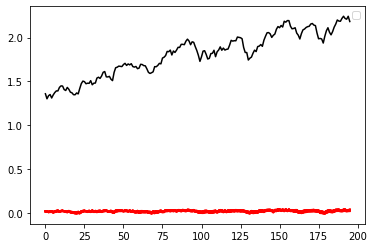

ValueError: ignored

In [ ]:
from sklearn.metrics import mean_absolute_error

plt.plot(y_test, color = 'black')
plt.plot(y_pred, color = 'red')

plt.legend()
plt.show()
mean_absolute_error(y_test,y_pred)

In [ ]:
df_1 = df1
date_id = df_1['Date ID']
df_1 = df_1.drop(columns = 'Date ID')
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
df_1 = scaler2.fit_transform(df_1)
df_2 = pd.DataFrame(df_1)

pred_list_val = regg.predict(df_2)
pred_list_val = np.array(pred_list_val)
pred_list_val = pred_list_val.flatten()
pred_list_val = pred_list_val.astype(str)
pred_list_val

IndexError: ignored

In [ ]:
pred_list_val_df = pd.DataFrame({'Date ID' : date_id, 
                                 'Predicted' : pred_list_val})
from pathlib import Path  
filepath = Path('/content/out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
pred_list_val_df.to_csv(filepath , index=False)
pred_list_val_df.dtypes

Date ID       int64
Predicted    object
dtype: object